In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import xrd
from importlib import reload
reload(xrd)

<module 'xrd' from '/Users/vekeryk/Projects/master-project-light/xrd.py'>

In [3]:
def load_dataset(filename="10_000.pkl"):
    """Load saved dataset"""
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data['X'], data['Y']

In [4]:
X_train, Y_train = load_dataset("datasets/dataset_1000_dl100_targeted.pkl")
print(X_train.shape)
print(Y_train.shape)

(1000, 7)
(1000, 701)


In [5]:
idx = np.argmax(Y_train[0])
idx

np.int64(20)

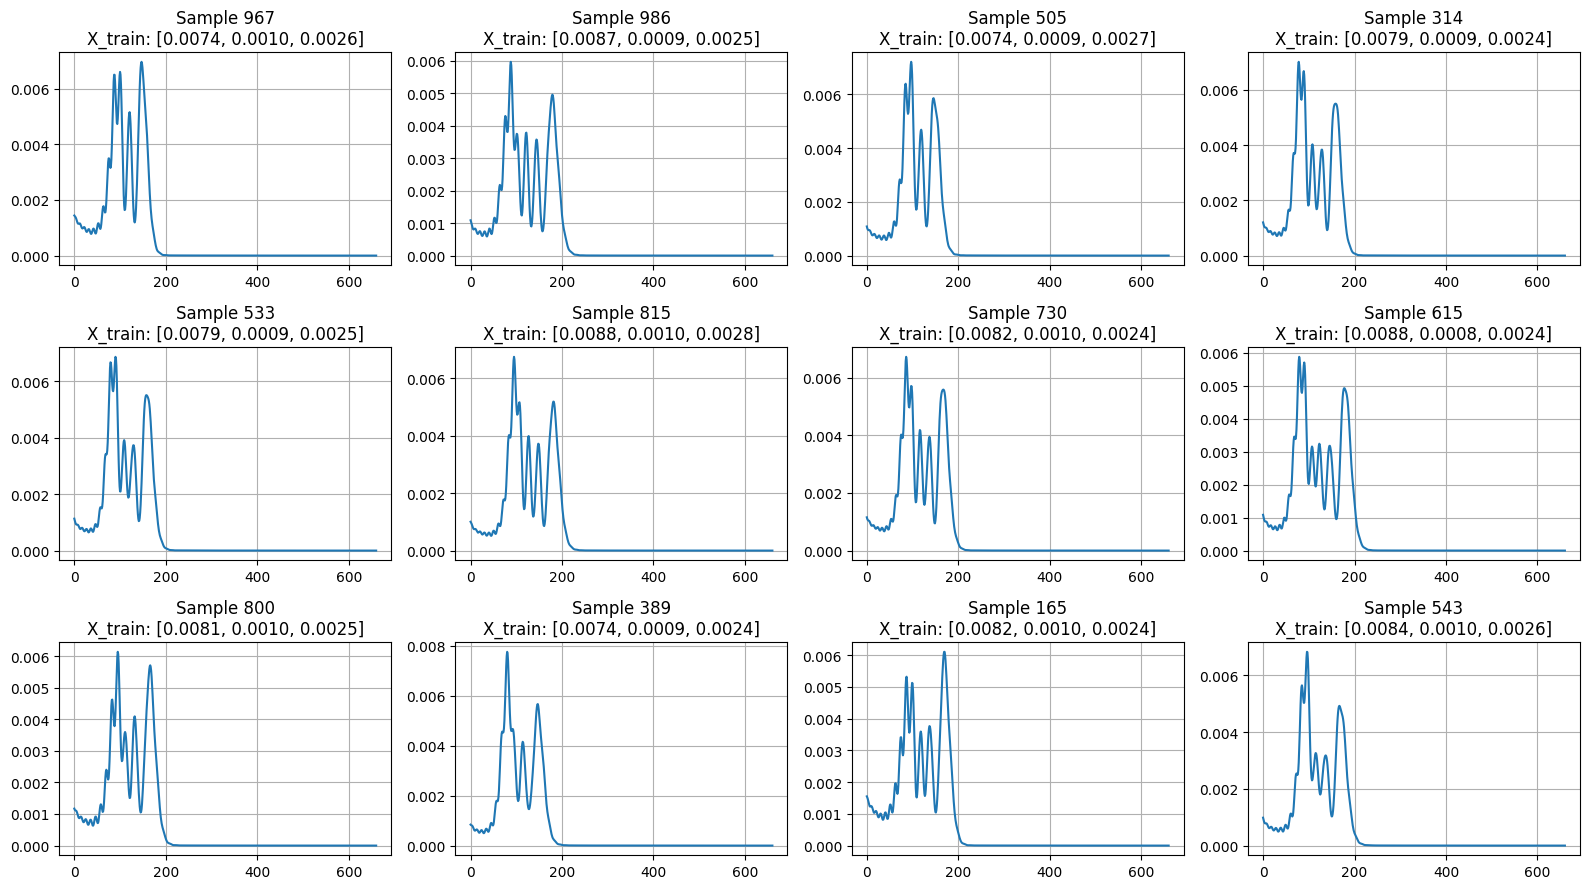

In [6]:
Y_train = Y_train[:, 40:]
size = Y_train.shape[1]
x = torch.linspace(0, size - 1, size)
rng = np.random.default_rng()
fig, axes = plt.subplots(3, 4, figsize=(16, 9))  # 3 rows, 4 columns

for i, ax in enumerate(axes.flat):
    rand_idx = np.random.randint(0, X_train.shape[0])
    ax.plot(x, Y_train[rand_idx], label=f"Curve {rand_idx}")
    # ax.set_yscale('log')
    x_vals = X_train[rand_idx]
    ax.set_title(f"Sample {rand_idx}\nX_train: [{x_vals[0]:.4f}, {x_vals[1]:.4f}, {x_vals[4]:.4f}]")
    ax.grid(True)

plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (661,) and (701,)

<Figure size 1200x600 with 0 Axes>

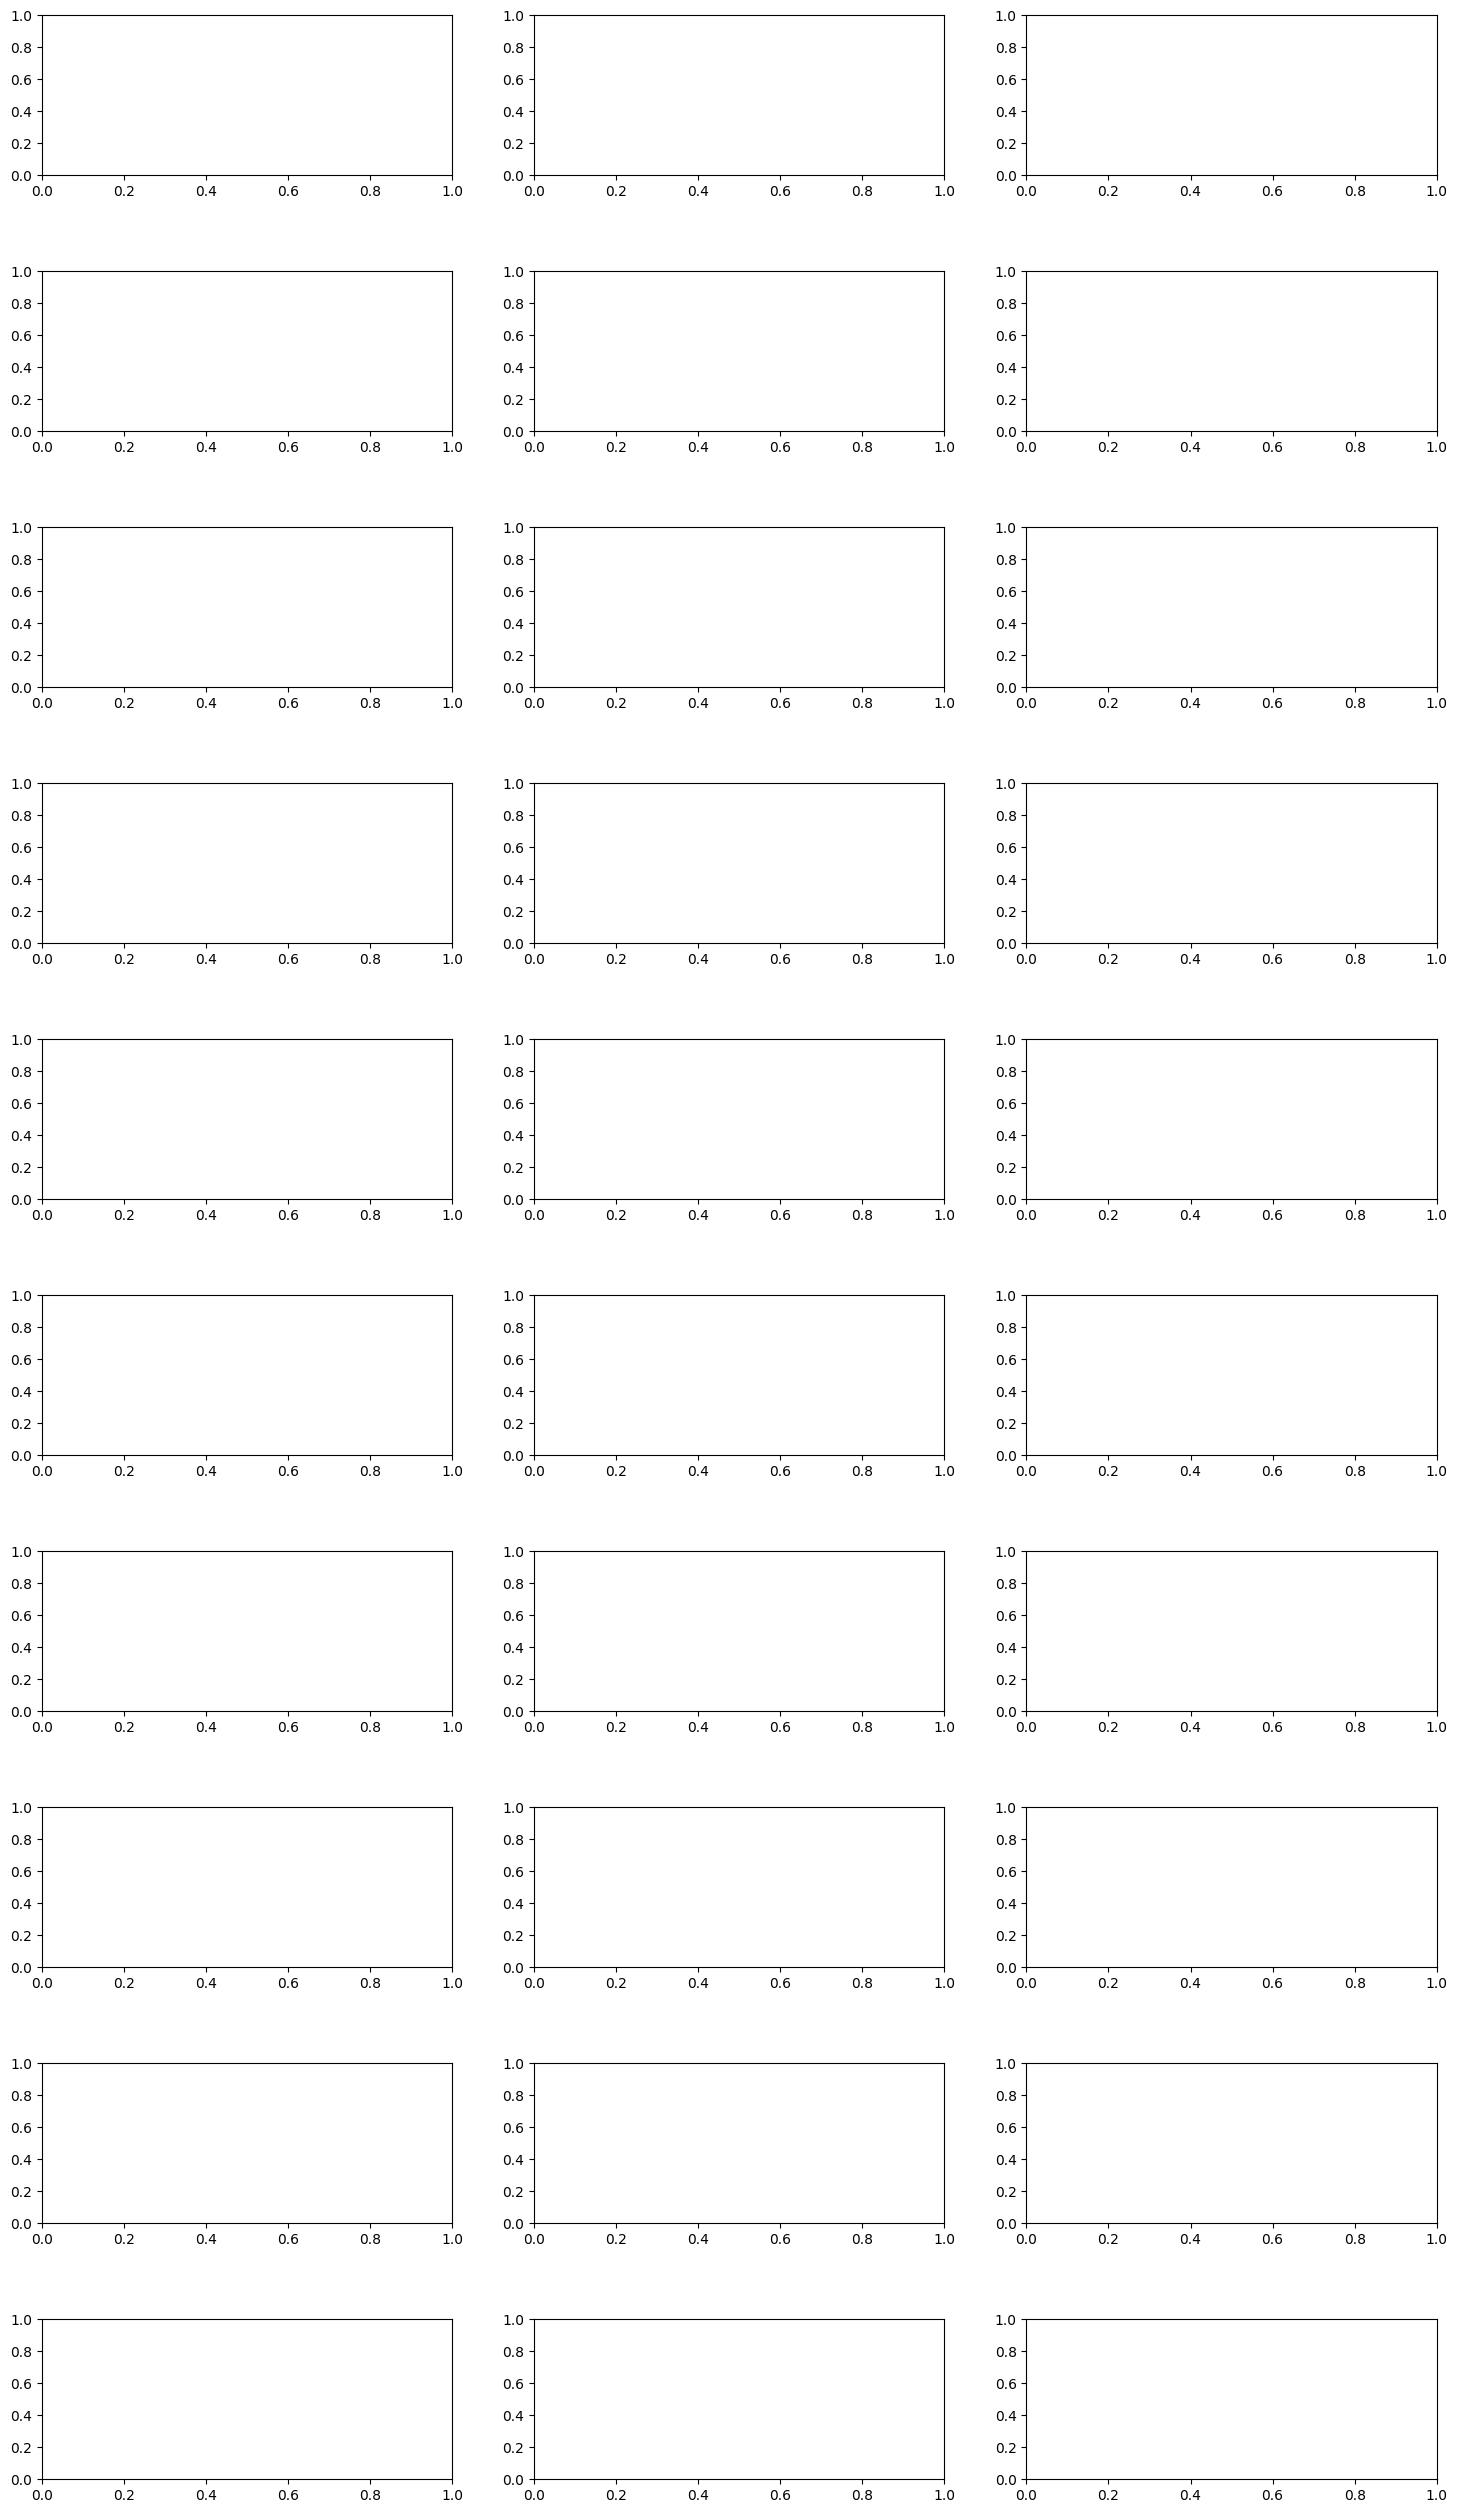

In [7]:
import helpers as h
import xrd
from importlib import reload
reload(xrd)
reload(h)

rng = np.random.default_rng()
indices = rng.choice(X_train.shape[0], size=10, replace=False)
x_long = torch.linspace(0, 1000 - 1, 1000)

plt.figure(figsize=(12, 6))

fig, axes = plt.subplots(len(indices), 3, figsize=(18, 32))
plt.subplots_adjust(hspace=0.6)  # add vertical space between rows


for i, idx in enumerate(indices):
    # print(X_train[idx])
    curve, profile = xrd.compute_curve_and_profile(array=X_train[idx])
    axes[i, 0].plot(x, curve.Y_R_vseZ, label=f"Curve {idx}")
    axes[i, 0].grid(True)
    axes[i, 0].set_yscale('log')
    axes[i, 0].legend()

    axes[i, 1].plot(curve.ML_X, curve.ML_Y, label=f"Curve {idx}")
    axes[i, 1].set_title(f"i={i} \n {h.fparam(arr=X_train[idx])}")
    axes[i, 1].grid(True)
    # axes[i, 0].set_yscale('log')
    axes[i, 1].legend()

    axes[i, 2].plot(profile.X, profile.total_Y, label="Total")
    axes[i, 2].plot(profile.X, profile.asymmetric_Y, label="Asymmetric")
    axes[i, 2].plot(profile.X, profile.decaying_Y, label="Decaying")
    axes[i, 2].grid(True)
    axes[i, 2].legend()

plt.title("10 Random Samples from X_train")
plt.xlabel("x")
plt.ylabel("Y_train")
plt.grid(True)
plt.legend()
plt.show()

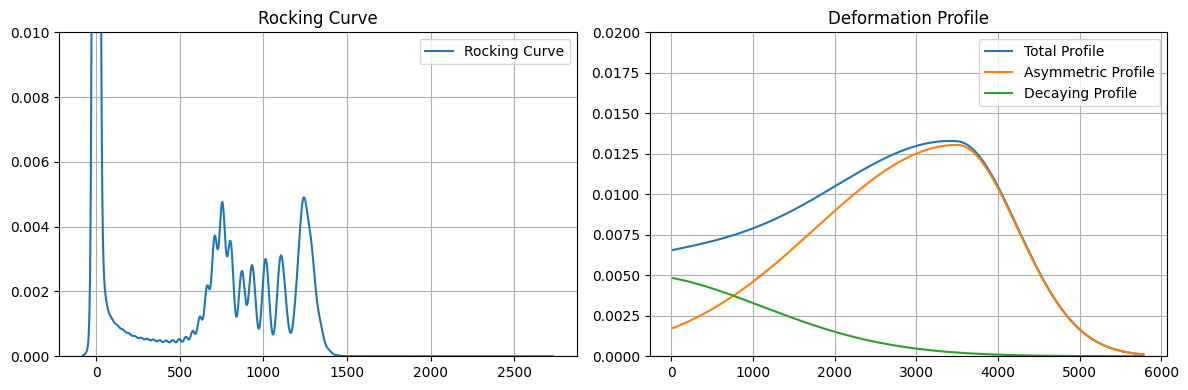

In [ ]:
# ПРИКЛАД ВИВЕДЕННЯ ОДНІЄЇ КРИВОЇ ТА ПРОФІЛЮ ДЕФОРМАЦІЇ
import xrd
from importlib import reload
reload(xrd)

params_obj = xrd.DeformationProfile(
    Dmax1=0.01305,
    D01=0.0017,
    L1=5800e-8,
    Rp1=3500e-8,
    D02=0.004845,
    L2=4000e-8,
    Rp2=-500e-8,
    Dmin=0.0001,
    dl=40e-8
)

curve, profile = xrd.compute_curve_and_profile(params_obj=params_obj)

fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # 12 width, 4 height

axes[0].set_title("Rocking Curve")
axes[0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="Rocking Curve")
axes[0].set_ylim(0, 0.01)
axes[0].grid(True)
axes[0].legend()

axes[1].set_title("Deformation Profile")
axes[1].plot(profile.X, profile.total_Y, label="Total Profile")
axes[1].plot(profile.X, profile.asymmetric_Y, label="Asymmetric Profile")
axes[1].plot(profile.X, profile.decaying_Y, label="Decaying Profile")
axes[1].set_ylim(0, 0.02)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# compare original params/normalized/denormalized
from train_from_file import NormalizedXRDDataset, denorm_params

ds_tr = NormalizedXRDDataset(X_train[[0, 0]], Y_train[[0, 0]], train=True)
print(ds_tr)
dl_tr = torch.utils.data.DataLoader(ds_tr, shuffle=True)
print(ds_tr)

for x, y in dl_tr:
    x, y = x.to('cpu'), y.to('cpu')
    print(x.shape, y.shape)

print(X_train[[0, 0]])
print(y)
denorm_params(y)

ModuleNotFoundError: No module named 'train_from_file'

True params: [0.008094, 0.000943, 5.2e-05, 3.5e-05, 0.00255, 3e-05, -5e-07], Pred params: [0.008112, 0.000944, 5.184e-05, 3.481e-05, 0.002638, 3.026e-05, -5.092e-07]
True params: [0.008094, 0.000943, 5.2e-05, 3.5e-05, 0.00255, 3e-05, -5e-07], Pred params: [0.008112, 0.000944, 5.184e-05, 3.481e-05, 0.002638, 3.026e-05, -5.092e-07]


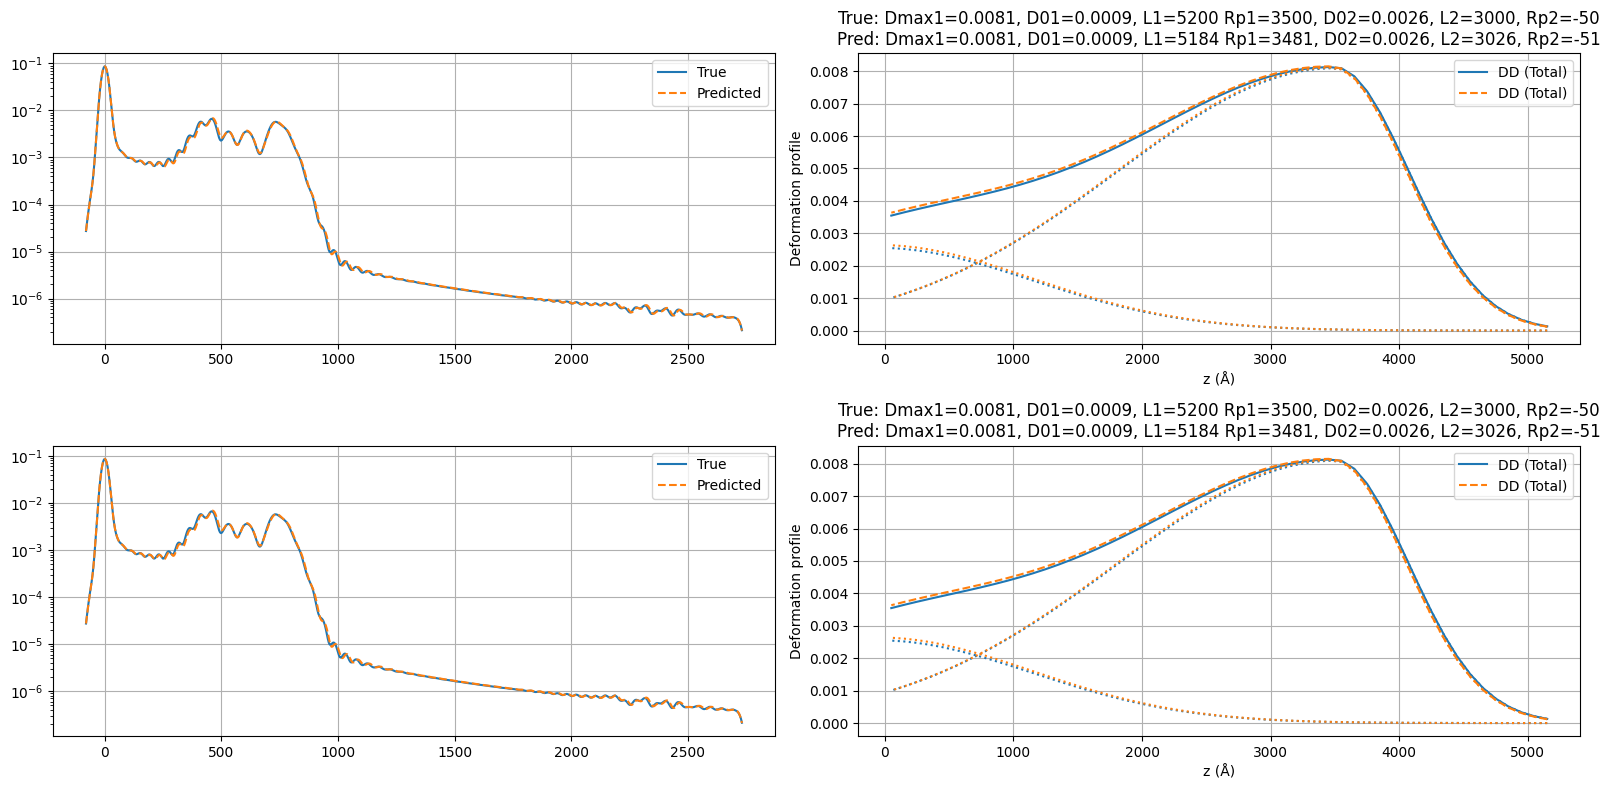

In [9]:
import matplotlib.pyplot as plt
import xrd
import helpers as h
from importlib import reload
reload(xrd)

# Examples after training (true vs predicted):
true_pred_pairs = [
  ([0.008094, 0.000943, 5.200e-05, 3.500e-05, 0.002550, 3.000e-05, -5.000e-07], [0.008112, 0.000944, 5.184e-05, 3.481e-05, 0.002638, 3.026e-05, -5.092e-07]),
  ([0.008094, 0.000943, 5.200e-05, 3.500e-05, 0.002550, 3.000e-05, -5.000e-07], [0.008112, 0.000944, 5.184e-05, 3.481e-05, 0.002638, 3.026e-05, -5.092e-07]),
# ([0.006702, 0.000769, 5.304e-05, 4.172e-05, 0.002968, 2.748e-05, -4.280e-07], [0.006753, 0.000841, 5.032e-05, 3.315e-05, 0.002571, 2.818e-05, -3.908e-07]),
#   ([0.006475, 0.000807, 4.763e-05, 3.052e-05, 0.002958, 3.408e-05, -4.220e-07], [0.007425, 0.000865, 5.319e-05, 3.087e-05, 0.002492, 3.164e-05, -3.937e-07]),
#   ([0.009098, 0.001086, 4.597e-05, 3.584e-05, 0.002968, 2.616e-05, -4.460e-07], [0.009032, 0.001214, 5.229e-05, 3.067e-05, 0.002949, 2.974e-05, -9.655e-07]),
#   ([0.008094, 0.001011, 4.826e-05, 3.878e-05, 0.002499, 2.592e-05, -5.680e-07], [0.008397, 0.000975, 4.743e-05, 3.450e-05, 0.002725, 2.994e-05, -4.987e-07]),
#   ([0.008321, 0.000800, 4.326e-05, 4.074e-05, 0.003019, 3.084e-05, -4.320e-07], [0.008192, 0.000839, 4.332e-05, 3.883e-05, 0.002654, 3.015e-05, -2.978e-07]),
#   ([0.009260, 0.001101, 6.053e-05, 3.136e-05, 0.002397, 2.604e-05, -5.700e-07], [0.008533, 0.000973, 5.679e-05, 3.154e-05, 0.002550, 3.192e-05, -5.147e-07]),
#   ([0.006508, 0.001117, 6.157e-05, 4.018e-05, 0.002091, 3.312e-05, -4.380e-07], [0.007384, 0.000916, 5.641e-05, 3.167e-05, 0.002528, 3.211e-05, -4.206e-07]),
#   ([0.009292, 0.000785, 4.493e-05, 2.968e-05, 0.002295, 2.724e-05, -5.040e-07], [0.009059, 0.000816, 4.565e-05, 2.786e-05, 0.002610, 2.724e-05, -3.297e-07]),
#   ([0.006572, 0.000852, 4.826e-05, 4.144e-05, 0.002948, 2.976e-05, -4.100e-07], [0.006346, 0.000821, 4.641e-05, 3.528e-05, 0.002544, 3.025e-05, -3.382e-07]),
#   ([0.008580, 0.001094, 4.846e-05, 4.130e-05, 0.002173, 3.084e-05, -5.920e-07], [0.008900, 0.000912, 4.772e-05, 4.005e-05, 0.002618, 3.237e-05, -4.143e-07]),
#   ([0.008353, 0.001007, 5.054e-05, 3.402e-05, 0.002183, 3.264e-05, -5.600e-07], [0.008920, 0.000962, 5.425e-05, 3.500e-05, 0.002700, 2.949e-05, -5.363e-07]),
#   ([0.006508, 0.001003, 5.013e-05, 3.304e-05, 0.002621, 2.772e-05, -4.660e-07], [0.006567, 0.000875, 4.893e-05, 3.472e-05, 0.002590, 3.090e-05, -4.157e-07]),
#   ([0.009421, 0.000815, 4.451e-05, 3.668e-05, 0.002611, 3.564e-05, -5.120e-07], [0.009314, 0.000836, 4.699e-05, 3.747e-05, 0.002628, 2.986e-05, -2.991e-07]),
#   ([0.006831, 0.000834, 5.262e-05, 3.024e-05, 0.002866, 3.252e-05, -4.960e-07], [0.006943, 0.000994, 5.228e-05, 3.396e-05, 0.002718, 3.128e-05, -6.011e-07]),
#   ([0.007964, 0.000905, 5.117e-05, 3.360e-05, 0.002060, 2.988e-05, -5.100e-07], [0.008561, 0.000875, 5.479e-05, 3.526e-05, 0.002622, 2.823e-05, -4.248e-07]),
#   ([0.009551, 0.000958, 4.597e-05, 3.136e-05, 0.002744, 2.652e-05, -4.480e-07], [0.009302, 0.000933, 4.644e-05, 2.872e-05, 0.002720, 2.855e-05, -4.760e-07]),
#   ([0.008483, 0.001124, 4.701e-05, 4.004e-05, 0.002764, 3.204e-05, -4.060e-07], [0.008552, 0.001033, 4.624e-05, 3.745e-05, 0.002747, 3.230e-05, -5.761e-07]),
#   ([0.007641, 0.001086, 5.574e-05, 3.318e-05, 0.002785, 2.448e-05, -5.460e-07], [0.007937, 0.001012, 5.296e-05, 3.220e-05, 0.002758, 2.915e-05, -6.409e-07]),
#   ([0.006572, 0.000766, 5.408e-05, 3.108e-05, 0.002213, 2.952e-05, -4.640e-07], [0.007528, 0.000902, 5.603e-05, 3.162e-05, 0.002512, 3.194e-05, -4.235e-07]),
#   ([0.006702, 0.000852, 5.866e-05, 3.892e-05, 0.002948, 2.880e-05, -4.940e-07], [0.007113, 0.000990, 5.739e-05, 3.458e-05, 0.002729, 3.089e-05, -5.357e-07]),
#   ([0.007641, 0.001086, 5.574e-05, 3.318e-05, 0.002785, 2.448e-05, -5.460e-07], [0.007937, 0.001012, 5.296e-05, 3.220e-05, 0.002758, 2.915e-05, -6.409e-07]),
#   ([0.008126, 0.001045, 5.366e-05, 3.500e-05, 0.002224, 2.748e-05, -4.860e-07], [0.008674, 0.000950, 5.483e-05, 3.535e-05, 0.002686, 2.941e-05, -5.222e-07]),
#   ([0.008029, 0.001030, 6.136e-05, 3.696e-05, 0.002652, 2.952e-05, -4.620e-07], [0.008502, 0.001087, 5.778e-05, 3.687e-05, 0.002761, 3.167e-05, -7.180e-07]),
#   ([0.008677, 0.001018, 6.219e-05, 3.752e-05, 0.002428, 2.988e-05, -5.620e-07], [0.008950, 0.001127, 5.768e-05, 3.753e-05, 0.002783, 3.096e-05, -7.190e-07]),
#   ([0.008806, 0.000758, 5.158e-05, 3.150e-05, 0.002275, 2.688e-05, -5.460e-07], [0.008974, 0.000918, 5.060e-05, 2.960e-05, 0.002702, 2.734e-05, -5.041e-07]),
#   ([0.009227, 0.000992, 4.202e-05, 3.444e-05, 0.002856, 3.096e-05, -5.240e-07], [0.009234, 0.000944, 4.559e-05, 3.484e-05, 0.002730, 3.005e-05, -4.324e-07]),
#   ([0.007900, 0.000796, 4.950e-05, 3.472e-05, 0.002581, 3.588e-05, -4.140e-07], [0.008341, 0.001065, 5.396e-05, 3.491e-05, 0.002780, 3.073e-05, -6.833e-07]),
#   ([0.008256, 0.000868, 5.533e-05, 3.612e-05, 0.002581, 3.492e-05, -5.700e-07], [0.008900, 0.001063, 5.576e-05, 3.548e-05, 0.002766, 3.075e-05, -6.961e-07]),
#   ([0.006993, 0.000996, 4.534e-05, 3.780e-05, 0.002897, 3.516e-05, -5.540e-07], [0.007148, 0.000993, 5.022e-05, 3.336e-05, 0.002695, 3.156e-05, -5.907e-07]),
#   ([0.007867, 0.000868, 5.866e-05, 4.130e-05, 0.003019, 3.192e-05, -4.500e-07], [0.008031, 0.001085, 5.340e-05, 3.606e-05, 0.002782, 3.181e-05, -7.033e-07]),
#   ([0.009195, 0.000920, 4.659e-05, 4.018e-05, 0.002927, 2.760e-05, -4.580e-07], [0.009057, 0.000862, 4.575e-05, 3.691e-05, 0.002660, 2.988e-05, -3.242e-07]),
#   ([0.009357, 0.000902, 5.886e-05, 3.738e-05, 0.002601, 2.916e-05, -4.480e-07], [0.009404, 0.001016, 5.744e-05, 3.446e-05, 0.002729, 2.959e-05, -6.523e-07]),
#   ([0.008742, 0.000917, 5.221e-05, 3.234e-05, 0.002560, 3.252e-05, -5.300e-07], [0.009141, 0.001057, 5.405e-05, 3.164e-05, 0.002805, 2.891e-05, -7.192e-07]),
#   ([0.009130, 0.001101, 4.472e-05, 3.430e-05, 0.002224, 3.324e-05, -5.700e-07], [0.009373, 0.001128, 4.904e-05, 3.411e-05, 0.002836, 3.118e-05, -7.208e-07]),
#   ([0.009065, 0.001041, 5.678e-05, 3.822e-05, 0.003040, 3.000e-05, -4.000e-07], [0.008948, 0.001146, 5.801e-05, 3.462e-05, 0.002836, 3.030e-05, -7.989e-07]),
#   ([0.007446, 0.001124, 6.198e-05, 2.996e-05, 0.002764, 3.468e-05, -5.760e-07], [0.007030, 0.000928, 5.680e-05, 3.014e-05, 0.002494, 3.257e-05, -4.269e-07]),
#   ([0.008094, 0.000920, 5.262e-05, 2.800e-05, 0.003029, 3.408e-05, -4.800e-07], [0.008100, 0.000925, 5.503e-05, 3.113e-05, 0.002532, 3.176e-05, -4.625e-07]),
#   ([0.007608, 0.000856, 4.618e-05, 3.570e-05, 0.002652, 2.832e-05, -5.120e-07], [0.007648, 0.000837, 4.721e-05, 3.519e-05, 0.002600, 2.871e-05, -3.258e-07]),
#   ([0.009227, 0.001022, 5.491e-05, 4.018e-05, 0.002407, 3.600e-05, -5.500e-07], [0.009286, 0.001072, 5.534e-05, 3.881e-05, 0.002712, 3.271e-05, -7.556e-07]),
#   ([0.009616, 0.000769, 6.011e-05, 3.948e-05, 0.002723, 2.760e-05, -4.160e-07], [0.009421, 0.000914, 5.660e-05, 3.545e-05, 0.002644, 2.919e-05, -4.911e-07]),
#   ([0.008288, 0.000815, 4.930e-05, 2.842e-05, 0.002897, 3.252e-05, -5.220e-07], [0.008684, 0.001028, 5.348e-05, 2.856e-05, 0.002810, 2.754e-05, -7.162e-07]),
#   ([0.009260, 0.001105, 4.909e-05, 2.828e-05, 0.002162, 3.588e-05, -4.280e-07], [0.009089, 0.000913, 4.770e-05, 2.923e-05, 0.002585, 3.185e-05, -4.117e-07]),
#   ([0.009680, 0.000860, 5.574e-05, 2.968e-05, 0.002856, 2.856e-05, -5.420e-07], [0.008659, 0.000978, 5.671e-05, 3.145e-05, 0.002553, 3.190e-05, -5.263e-07]),
#   ([0.008094, 0.000924, 5.803e-05, 3.864e-05, 0.002050, 2.544e-05, -4.480e-07], [0.008912, 0.000842, 5.755e-05, 3.833e-05, 0.002538, 2.924e-05, -3.852e-07]),
#   ([0.007673, 0.001086, 5.990e-05, 2.828e-05, 0.002346, 2.640e-05, -4.740e-07], [0.008146, 0.000948, 5.645e-05, 3.155e-05, 0.002540, 3.194e-05, -4.822e-07]),
#   ([0.009162, 0.000954, 4.410e-05, 4.200e-05, 0.002621, 3.600e-05, -5.220e-07], [0.009122, 0.000893, 4.438e-05, 4.046e-05, 0.002621, 3.256e-05, -3.897e-07]),
#   ([0.009098, 0.001037, 5.346e-05, 4.088e-05, 0.002111, 2.664e-05, -4.160e-07], [0.009409, 0.000954, 5.092e-05, 3.835e-05, 0.002673, 3.165e-05, -4.818e-07]),
#   ([0.006572, 0.000796, 5.304e-05, 4.074e-05, 0.002397, 3.384e-05, -4.040e-07], [0.006974, 0.000906, 5.090e-05, 3.471e-05, 0.002640, 2.977e-05, -4.535e-07]),
#   ([0.009713, 0.001075, 5.096e-05, 4.158e-05, 0.002734, 2.412e-05, -5.280e-07], [0.009439, 0.000912, 5.020e-05, 3.763e-05, 0.002658, 3.089e-05, -4.140e-07]),
#   ([0.009162, 0.000849, 4.264e-05, 3.696e-05, 0.003009, 2.856e-05, -5.760e-07], [0.008893, 0.000813, 4.349e-05, 3.641e-05, 0.002674, 2.834e-05, -2.669e-07]),
#   ([0.009357, 0.000856, 5.554e-05, 4.144e-05, 0.002244, 2.448e-05, -5.800e-07], [0.009295, 0.000800, 5.693e-05, 3.844e-05, 0.002501, 2.867e-05, -3.386e-07]),
#   ([0.007900, 0.000977, 5.741e-05, 2.912e-05, 0.002825, 3.264e-05, -4.180e-07], [0.008514, 0.000967, 5.641e-05, 3.138e-05, 0.002549, 3.187e-05, -5.113e-07]),
#   ([0.008515, 0.000886, 5.886e-05, 3.164e-05, 0.002499, 3.540e-05, -4.940e-07], [0.008142, 0.000931, 5.538e-05, 3.123e-05, 0.002533, 3.179e-05, -4.687e-07]),
#   ([0.006767, 0.000807, 5.928e-05, 3.514e-05, 0.002356, 2.940e-05, -5.640e-07], [0.007480, 0.000939, 5.743e-05, 3.592e-05, 0.002658, 3.026e-05, -4.835e-07]),
#   ([0.009227, 0.000819, 5.574e-05, 3.136e-05, 0.002703, 3.036e-05, -5.120e-07], [0.008744, 0.000979, 5.652e-05, 3.134e-05, 0.002555, 3.185e-05, -5.310e-07]),
#   ([0.008353, 0.000905, 5.429e-05, 3.542e-05, 0.002091, 3.564e-05, -5.540e-07], [0.007998, 0.000934, 5.626e-05, 3.157e-05, 0.002532, 3.191e-05, -4.656e-07]),
#   ([0.008742, 0.001022, 5.470e-05, 3.416e-05, 0.002132, 2.928e-05, -5.920e-07], [0.008304, 0.000955, 5.643e-05, 3.150e-05, 0.002543, 3.190e-05, -4.938e-07]),
#   ([0.009519, 0.000958, 5.970e-05, 3.766e-05, 0.002958, 2.496e-05, -5.020e-07], [0.009394, 0.001008, 5.667e-05, 3.351e-05, 0.002736, 2.917e-05, -6.445e-07]),
#   ([0.006540, 0.001052, 4.763e-05, 3.024e-05, 0.002173, 3.144e-05, -5.620e-07], [0.007508, 0.000870, 5.172e-05, 3.048e-05, 0.002505, 3.169e-05, -4.004e-07]),
#   ([0.007544, 0.000841, 5.221e-05, 3.514e-05, 0.002122, 2.772e-05, -4.360e-07], [0.007948, 0.000937, 5.372e-05, 3.386e-05, 0.002681, 2.883e-05, -5.135e-07]),
#   ([0.008968, 0.001015, 5.054e-05, 3.010e-05, 0.002927, 2.532e-05, -4.620e-07], [0.008874, 0.001143, 4.959e-05, 2.926e-05, 0.002900, 2.927e-05, -8.388e-07]),
#   ([0.007673, 0.001101, 5.637e-05, 4.074e-05, 0.002652, 2.508e-05, -5.160e-07], [0.008071, 0.001072, 5.243e-05, 3.599e-05, 0.002774, 3.157e-05, -6.743e-07]),
#   ([0.009033, 0.001056, 5.304e-05, 3.066e-05, 0.002356, 3.360e-05, -5.440e-07], [0.008618, 0.000959, 5.311e-05, 3.031e-05, 0.002570, 3.183e-05, -5.040e-07]),
#   ([0.006734, 0.000766, 6.178e-05, 3.752e-05, 0.002917, 3.036e-05, -5.080e-07], [0.007226, 0.000969, 5.613e-05, 3.369e-05, 0.002709, 3.028e-05, -5.553e-07]),
#   ([0.006767, 0.000973, 6.094e-05, 3.542e-05, 0.002948, 3.528e-05, -5.740e-07], [0.007102, 0.000975, 5.644e-05, 3.354e-05, 0.002703, 3.147e-05, -5.492e-07]),
#   ([0.006540, 0.001052, 5.408e-05, 4.130e-05, 0.002091, 3.336e-05, -5.600e-07], [0.006950, 0.000950, 5.422e-05, 3.452e-05, 0.002675, 3.112e-05, -5.249e-07]),
#   ([0.007867, 0.001113, 5.221e-05, 3.528e-05, 0.002417, 2.484e-05, -4.400e-07], [0.008194, 0.001069, 5.266e-05, 3.376e-05, 0.002796, 3.028e-05, -6.935e-07]),
#   ([0.009162, 0.000988, 5.054e-05, 3.598e-05, 0.002122, 3.192e-05, -4.880e-07], [0.009381, 0.000925, 5.218e-05, 3.640e-05, 0.002670, 3.016e-05, -4.524e-07]),
#   ([0.006540, 0.001018, 5.346e-05, 3.136e-05, 0.002479, 3.336e-05, -5.260e-07], [0.007444, 0.000891, 5.582e-05, 3.161e-05, 0.002504, 3.190e-05, -4.140e-07]),
#   ([0.008450, 0.000947, 4.826e-05, 3.850e-05, 0.002774, 3.324e-05, -4.820e-07], [0.008566, 0.001140, 4.801e-05, 3.528e-05, 0.002842, 3.172e-05, -7.387e-07]),
#   ([0.007479, 0.001079, 5.325e-05, 3.864e-05, 0.002601, 3.360e-05, -5.520e-07], [0.007719, 0.001086, 5.451e-05, 3.736e-05, 0.002766, 3.293e-05, -7.246e-07]),
#   ([0.008871, 0.001037, 6.198e-05, 3.304e-05, 0.002785, 3.480e-05, -4.300e-07], [0.008425, 0.000965, 5.667e-05, 3.154e-05, 0.002547, 3.192e-05, -5.050e-07]),
#   ([0.008903, 0.001117, 4.368e-05, 3.794e-05, 0.002652, 3.588e-05, -4.060e-07], [0.008925, 0.001107, 5.594e-05, 3.954e-05, 0.002759, 3.345e-05, -8.536e-07]),
#   ([0.008806, 0.001011, 4.326e-05, 4.032e-05, 0.002295, 2.652e-05, -4.040e-07], [0.008844, 0.000789, 4.336e-05, 3.998e-05, 0.002611, 2.990e-05, -2.354e-07]),
#   ([0.008029, 0.001132, 5.512e-05, 4.060e-05, 0.002601, 3.168e-05, -5.480e-07], [0.008125, 0.001067, 5.229e-05, 3.749e-05, 0.002743, 3.252e-05, -6.672e-07]),
#   ([0.007900, 0.001094, 5.200e-05, 3.430e-05, 0.002234, 3.480e-05, -4.440e-07], [0.007774, 0.000919, 5.615e-05, 3.161e-05, 0.002523, 3.193e-05, -4.464e-07]),
#   ([0.007964, 0.000932, 4.202e-05, 3.822e-05, 0.002234, 2.820e-05, -5.980e-07], [0.008027, 0.000765, 4.282e-05, 3.925e-05, 0.002613, 2.878e-05, -2.111e-07]),
#   ([0.007187, 0.000762, 4.763e-05, 3.990e-05, 0.002295, 2.616e-05, -4.800e-07], [0.007564, 0.000725, 4.477e-05, 3.802e-05, 0.002533, 2.755e-05, -1.773e-07]),
#   ([0.008191, 0.001109, 5.928e-05, 3.598e-05, 0.002081, 3.444e-05, -4.340e-07], [0.008060, 0.000941, 5.644e-05, 3.159e-05, 0.002535, 3.194e-05, -4.720e-07]),
#   ([0.009098, 0.000973, 6.240e-05, 3.304e-05, 0.003060, 3.288e-05, -4.880e-07], [0.008577, 0.000974, 5.675e-05, 3.151e-05, 0.002551, 3.190e-05, -5.182e-07]),
#   ([0.009357, 0.000868, 5.949e-05, 3.500e-05, 0.002122, 3.108e-05, -4.380e-07], [0.008709, 0.000980, 5.674e-05, 3.143e-05, 0.002553, 3.189e-05, -5.276e-07]),
#   ([0.009421, 0.000822, 6.157e-05, 2.800e-05, 0.002897, 2.700e-05, -4.300e-07], [0.008835, 0.000975, 5.344e-05, 3.031e-05, 0.002578, 3.185e-05, -5.257e-07]),
#   ([0.006702, 0.001030, 4.846e-05, 3.710e-05, 0.002611, 2.592e-05, -5.120e-07], [0.006754, 0.000935, 4.961e-05, 3.457e-05, 0.002654, 3.097e-05, -5.005e-07]),
#   ([0.007317, 0.000868, 4.909e-05, 3.626e-05, 0.002907, 3.132e-05, -4.640e-07], [0.007682, 0.001142, 4.869e-05, 3.233e-05, 0.002877, 3.050e-05, -8.106e-07]),
#   ([0.007932, 0.000883, 6.240e-05, 3.794e-05, 0.002948, 3.276e-05, -4.640e-07], [0.008061, 0.001094, 5.770e-05, 3.603e-05, 0.002792, 3.171e-05, -7.092e-07]),
#   ([0.007576, 0.000830, 4.285e-05, 4.158e-05, 0.002989, 2.400e-05, -4.060e-07], [0.007609, 0.000705, 4.175e-05, 4.017e-05, 0.002581, 2.744e-05, -1.505e-07]),
#   ([0.008709, 0.000788, 6.157e-05, 3.752e-05, 0.002683, 2.856e-05, -5.800e-07], [0.009141, 0.000904, 5.691e-05, 3.513e-05, 0.002639, 2.852e-05, -4.845e-07]),
#   ([0.007317, 0.000822, 5.803e-05, 3.164e-05, 0.002815, 3.276e-05, -4.080e-07], [0.008025, 0.000934, 5.617e-05, 3.153e-05, 0.002532, 3.190e-05, -4.680e-07]),
#   ([0.009162, 0.000992, 5.138e-05, 3.976e-05, 0.002968, 3.192e-05, -5.220e-07], [0.009290, 0.001121, 4.786e-05, 3.616e-05, 0.002817, 3.222e-05, -7.030e-07]),
#   ([0.008256, 0.001090, 4.888e-05, 4.018e-05, 0.002744, 3.396e-05, -5.440e-07], [0.008518, 0.001082, 4.817e-05, 3.781e-05, 0.002762, 3.306e-05, -6.787e-07]),
#   ([0.008450, 0.001056, 5.117e-05, 3.668e-05, 0.003050, 2.760e-05, -4.080e-07], [0.008461, 0.001165, 4.837e-05, 3.307e-05, 0.002883, 3.074e-05, -7.996e-07]),
#   ([0.006864, 0.001045, 5.096e-05, 3.304e-05, 0.002897, 3.516e-05, -5.300e-07], [0.007707, 0.000895, 5.475e-05, 3.121e-05, 0.002511, 3.173e-05, -4.264e-07]),
#   ([0.008903, 0.001011, 5.762e-05, 3.584e-05, 0.002621, 2.436e-05, -4.200e-07], [0.009237, 0.001091, 5.450e-05, 3.218e-05, 0.002826, 2.943e-05, -7.656e-07]),
#   ([0.007544, 0.001098, 4.867e-05, 3.626e-05, 0.002693, 3.156e-05, -5.280e-07], [0.007451, 0.001143, 4.909e-05, 3.221e-05, 0.002882, 3.065e-05, -8.314e-07]),
#   ([0.009162, 0.000905, 5.221e-05, 3.906e-05, 0.002519, 3.516e-05, -5.200e-07], [0.009337, 0.000961, 5.380e-05, 3.839e-05, 0.002658, 3.141e-05, -5.246e-07]),
#   ([0.007803, 0.000811, 6.198e-05, 3.878e-05, 0.002632, 3.012e-05, -4.260e-07], [0.008350, 0.000951, 5.749e-05, 3.620e-05, 0.002664, 2.981e-05, -5.230e-07]),
#   ([0.008094, 0.001071, 5.221e-05, 4.102e-05, 0.002285, 3.204e-05, -4.020e-07], [0.008463, 0.001018, 5.441e-05, 3.955e-05, 0.002657, 3.280e-05, -6.279e-07]),
#   ([0.008839, 0.000781, 5.262e-05, 3.346e-05, 0.002989, 2.628e-05, -4.400e-07], [0.008966, 0.000959, 5.142e-05, 2.985e-05, 0.002738, 2.763e-05, -5.724e-07]),
#   ([0.008547, 0.001000, 5.096e-05, 2.926e-05, 0.002703, 3.372e-05, -5.680e-07], [0.008325, 0.000976, 5.696e-05, 3.160e-05, 0.002554, 3.202e-05, -5.067e-07]),
#   ([0.009227, 0.000777, 4.618e-05, 3.808e-05, 0.002621, 2.712e-05, -5.540e-07], [0.009183, 0.000849, 4.532e-05, 3.409e-05, 0.002666, 2.857e-05, -3.215e-07]),
]

def plot_profils(ax, profile, color, linestyle, pred=False):
    # L = dl * km
    # x_vals = [(L - dl * k + dl / 2) / 1e-8 for k in range(1, km + 1)]
    # ax.figure(figsize=(5, 3))
    ax.plot(profile.X, profile.total_Y, label='DD (Total)', color=color, linestyle=linestyle)
    # 'DDPL1 (Asymmetric Gaussian)'
    ax.plot(profile.X, profile.asymmetric_Y, label=None, linestyle=':', color=color)
    # 'DDPL2 (Decaying Gaussian)'
    ax.plot(profile.X, profile.decaying_Y, label=None, linestyle=':', color=color)
    ax.set_xlabel('z (Å)')
    ax.set_ylabel('Deformation profile')
    # ax.set_title('Deformation Profile Components')

fig, axes = plt.subplots(len(true_pred_pairs), 2, figsize=(16, len(true_pred_pairs) * 4))
plt.subplots_adjust(hspace=0.6)  # add vertical space between rows

for i, (true_params, pred_params) in enumerate(true_pred_pairs):
    print(f"True params: {true_params}, Pred params: {pred_params}")
    # add true_params to plot

    curve, profile_true = xrd.compute_curve_and_profile(array=true_params, dl=100e-8)
    
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="True")
    axes[i, 0].grid(True)
    # log
    axes[i, 0].set_yscale('log')
    # axes[i, 0].set_ylim(0, 0.02)

    plot_profils(axes[i, 1], profile_true, 'C0', '-')

    curve, profile_pred = xrd.compute_curve_and_profile(array=pred_params, dl=100e-8)

    plot_profils(axes[i, 1], profile_pred, 'C1', '--')
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="Predicted", linestyle='dashed')
    axes[i, 1].set_title(f"True: {h.fparam(arr=true_params)}\nPred: {h.fparam(arr=pred_params)}")
    axes[i, 1].grid(True)
    # axes[i, 1].set_ylim(0, 0.03)
    axes[i, 1].legend()
    axes[i, 0].legend()


plt.tight_layout()
plt.show()